# ITS307 Data Analytics : Spring Semester 2022
# Assignment 3 [20 Marks]

# Supervised Learning: Classification

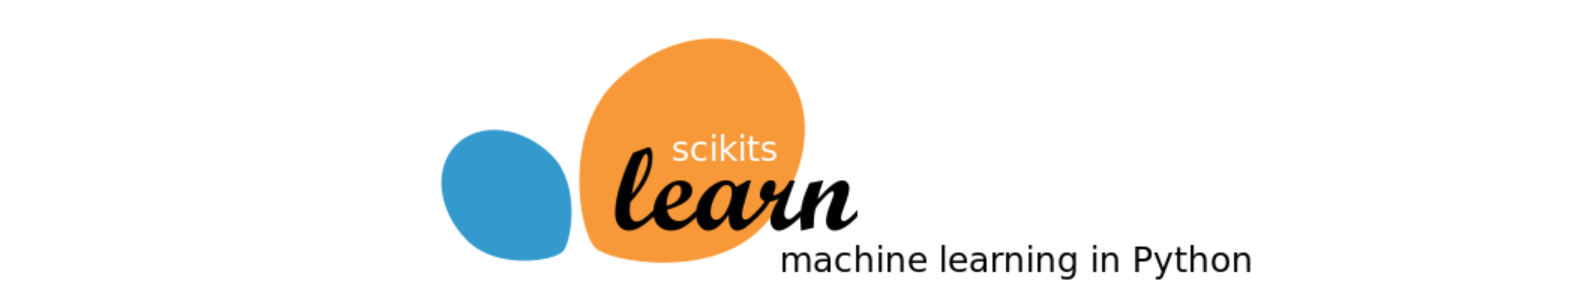

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For the purpose of this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this test, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 2. Loading and Cleaning Data with Pandas [3 M]



##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [6]:
columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']


df = pd.read_csv('creditcard.txt', names=columns)
df.head()

Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

  ZipCode  Income ApprovalStatus  
0   00202       0              +  
1   00043     560              +  
2   00280     824              +  
3   00100       3              +  
4   00120       0              +

In [7]:
df.shape

(690, 16)

## 2.2.  Print summary of the dataset

In [8]:
df.describe()

Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000

## 2.3. Check null values for all the colums in the dataset

In [9]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [10]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [11]:
df.replace('?', np.nan, inplace = True)


In [12]:
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [13]:
df['Age']=df.Age.astype('float')

# 3. Handling Missing Values [3 M]

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [14]:
numericdf = df.select_dtypes(include=['int64', 'float64'])
numericdf.head()

Age   Debt  YearsEmployed  CreditScore  Income
0  30.83  0.000           1.25            1       0
1  58.67  4.460           3.04            6     560
2  24.50  0.500           1.50            0     824
3  27.83  1.540           3.75            5       3
4  20.17  5.625           1.71            0       0

In [15]:
numericdf.isnull().sum()

Age              12
Debt              0
YearsEmployed     0
CreditScore       0
Income            0
dtype: int64

In [16]:
categoricaldf = df.select_dtypes(include=['object'])
categoricaldf.head(30)

Gender Married BankCustomer EducationLevel Ethnicity PriorDefault Employed  \
0       b       u            g              w         v            t        t   
1       a       u            g              q         h            t        t   
2       a       u            g              q         h            t        f   
3       b       u            g              w         v            t        t   
4       b       u            g              w         v            t        f   
5       b       u            g              m         v            t        f   
6       b       u            g              r         h            t        f   
7       a       u            g             cc         v            t        f   
8       b       y            p              k         h            t        f   
9       b       y            p              w         v            t        f   
10      b       u            g              c         h            f        f   
11      b       u            g              c         h            t        f   
12      a       u            g              k         v            t        f   
13      b       u            g              k         v            f        f   
14      a       u            g              q         v            t        t   
15      b       y            p              k         v            t        t   
16      b       u            g              m         v            t        t   
17      a       u            g              q         v            t        t   
18      b       u            g              d         h            t        f   
19      a       u            g             cc         h            t        t   
20      b       u            g              c         v            t        t   
21      b       u            g              c         v            t        f   
22      a       u            g              c         v            t        t   
23      a       u            g              x         h            t        t   
24      a       u            g              q         v            t        t   
25      a       u            g              c         h            t        t   
26      a       u            g              i        bb            t        t   
27      b       u            g              d        bb            t        t   
28      b       u            g              e         h            t        t   
29      b       u            g              w         v            t        t   

   DriversLicense Citizen ZipCode ApprovalStatus  
0               f       g   00202              +  
1               f       g   00043              +  
2               f       g   00280              +  
3               t       g   00100              +  
4               f       s   00120              +  
5               t       g   00360              +  
6               t       g   00164              +  
7               f       g   00080              +  
8               f       g   00180              +  
9               t       g   00052              +  
10              t       g   00128              +  
11              f       g   00260              +  
12              t       g   00000              +  
13              f       g   00000              +  
14              t       g   00000              +  
15              t       g   00320              +  
16              t       g   00396              +  
17              f       g   00120              +  
18              t       g   00000              +  
19              f       g   00096              +  
20              f       g   00200              +  
21              f       s   00300              +  
22              t       g   00000              +  
23              f       g   00120              +  
24              t       g   00145              +  
25              f       g   00100              +  
26              t       g   00000              +  
27              t       g   00000              +  
28          

In [17]:
categoricaldf.isnull().sum()

Gender            12
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
PriorDefault       0
Employed           0
DriversLicense     0
Citizen            0
ZipCode           13
ApprovalStatus     0
dtype: int64

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. If you are not aware with SimpleImputer, you may chose other imputation techniques you are confortable with for handling categorical values.


- Check missing records after imputation

In [18]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(categoricaldf[['Gender','Married','BankCustomer','EducationLevel','Ethnicity','ZipCode']])
categoricaldf[['Gender','Married','BankCustomer','EducationLevel','Ethnicity','ZipCode']] = imputer.transform(categoricaldf[['Gender','Married','BankCustomer','EducationLevel','Ethnicity','ZipCode']])

C:\Users\SonamCheda\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [19]:
categoricaldf.isnull().sum()

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
Citizen           0
ZipCode           0
ApprovalStatus    0
dtype: int64

In [20]:
categoricaldf['ZipCode']=categoricaldf.ZipCode.astype('int')

C:\Users\SONAMC~1\AppData\Local\Temp/ipykernel_1736/2543546689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricaldf['ZipCode']=categoricaldf.ZipCode.astype('int')


In [21]:
categoricaldf.dtypes

Gender            object
Married           object
BankCustomer      object
EducationLevel    object
Ethnicity         object
PriorDefault      object
Employed          object
DriversLicense    object
Citizen           object
ZipCode            int32
ApprovalStatus    object
dtype: object

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute categorical values with most frequest values. If you are not aware with SimpleImputer, you may chose other imputation techniques you are confortable with for handling categorical values.


- Check missing records after imputation

In [22]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(numericdf[['Age']])
numericdf[['Age']] = imputer.transform(numericdf[['Age']])

C:\Users\SonamCheda\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [23]:
numericdf.isnull().sum()

Age              0
Debt             0
YearsEmployed    0
CreditScore      0
Income           0
dtype: int64

# 4. Scaling Numerical Features[1.5]
- Use any scaling techniques to scale all the numerical features

In [24]:
numeric_columns = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
numericdataframe = numericdf[numeric_columns]

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdataframe)

In [26]:
 #dataframe after scaling
Tnumericdf = pd.DataFrame(data=numeric,columns=numeric_columns)
 #dataframe after scaling
Tnumericdf.head()

Age      Debt  YearsEmployed  CreditScore   Income
0  0.256842  0.000000       0.043860     0.014925  0.00000
1  0.675489  0.159286       0.106667     0.089552  0.00560
2  0.161654  0.017857       0.052632     0.000000  0.00824
3  0.211729  0.055000       0.131579     0.074627  0.00003
4  0.096541  0.200893       0.060000     0.000000  0.00000

# 5. Encode Categorical data[2.5 M]
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [27]:
categorical_columns=['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity','PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode']
cdf = categoricaldf[categorical_columns]
dummies_df = pd.get_dummies(cdf)
dummies_df.head(20)

ZipCode  Gender_a  Gender_b  Married_l  Married_u  Married_y  \
0       202         0         1          0          1          0   
1        43         1         0          0          1          0   
2       280         1         0          0          1          0   
3       100         0         1          0          1          0   
4       120         0         1          0          1          0   
5       360         0         1          0          1          0   
6       164         0         1          0          1          0   
7        80         1         0          0          1          0   
8       180         0         1          0          0          1   
9        52         0         1          0          0          1   
10      128         0         1          0          1          0   
11      260         0         1          0          1          0   
12        0         1         0          0          1          0   
13        0         0         1          0          1          0   
14        0         1         0          0          1          0   
15      320         0         1          0          0          1   
16      396         0         1          0          1          0   
17      120         1         0          0          1          0   
18        0         0         1          0          1          0   
19       96         1         0          0          1          0   

    BankCustomer_g  BankCustomer_gg  BankCustomer_p  EducationLevel_aa  ...  \
0                1                0               0                  0  ...   
1                1                0               0                  0  ...   
2                1                0               0                  0  ...   
3                1                0               0                  0  ...   
4                1                0               0                  0  ...   
5                1                0               0                  0  ...   
6                1                0               0                  0  ...   
7                1                0               0                  0  ...   
8                0                0               1                  0  ...   
9                0                0               1                  0  ...   
10               1                0               0                  0  ...   
11               1                0               0                  0  ...   
12               1                0               0                  0  ...   
13               1                0               0                  0  ...   
14               1                0               0                  0  ...   
15               0                0               1                  0  ...   
16               1                0               0                  0  ...   
17               1                0               0                  0  ...   
18               1                0               0                  0  ...   
19               1                0               0                  0  ...   

    Ethnicity_z  PriorDefault_f  PriorDefault_t  Employed_f  Employed_t  \
0             0               0               1           0           1   
1             0               0               1           0           1   
2             0               0               1           1           0   
3             0               0               1           0           1   
4             0               0               1           1           0   
5             0               0               1           1           0   
6             0               0               1           1           0   
7             0               0               1           1           0   
8             0               0               1           1           0   
9             0               0               1           1           0   
10            0               1               0           1           0   
11            0

In [28]:
#creating dummy variables for nominal categorical variable using get_dummies()
targetdf=categoricaldf[['ApprovalStatus']]
le =  LabelEncoder()
targetdf['ApprovalStatus'] = le.fit_transform(targetdf.ApprovalStatus)
targetdf.head()

C:\Users\SONAMC~1\AppData\Local\Temp/ipykernel_1736/4052527016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetdf['ApprovalStatus'] = le.fit_transform(targetdf.ApprovalStatus)


ApprovalStatus
0               0
1               0
2               0
3               0
4               0

In [29]:
#concat the target datafarme and categorical dataframe
df1=pd.concat([dummies_df,targetdf],axis=1)
df1

ZipCode  Gender_a  Gender_b  Married_l  Married_u  Married_y  \
0        202         0         1          0          1          0   
1         43         1         0          0          1          0   
2        280         1         0          0          1          0   
3        100         0         1          0          1          0   
4        120         0         1          0          1          0   
..       ...       ...       ...        ...        ...        ...   
685      260         0         1          0          0          1   
686      200         1         0          0          1          0   
687      200         1         0          0          0          1   
688      280         0         1          0          1          0   
689        0         0         1          0          1          0   

     BankCustomer_g  BankCustomer_gg  BankCustomer_p  EducationLevel_aa  ...  \
0                 1                0               0                  0  ...   
1                 1                0               0                  0  ...   
2                 1                0               0                  0  ...   
3                 1                0               0                  0  ...   
4                 1                0               0                  0  ...   
..              ...              ...             ...                ...  ...   
685               0                0               1                  0  ...   
686               1                0               0                  0  ...   
687               0                0               1                  0  ...   
688               1                0               0                  1  ...   
689               1                0               0                  0  ...   

     PriorDefault_f  PriorDefault_t  Employed_f  Employed_t  DriversLicense_f  \
0                 0               1           0           1                 1   
1                 0               1           0           1                 1   
2                 0               1           1           0                 1   
3                 0               1           0           1                 0   
4                 0               1           1           0                 1   
..              ...             ...         ...         ...               ...   
685               1               0           1           0                 1   
686               1               0           0           1                 0   
687               1               0           0           1                 0   
688               1               0           1           0                 1   
689               1               0           1           0                 0   

     DriversLicense_t  Citizen_g  Citizen_p  Citizen_s  ApprovalStatus  
0                   0          1          0          0               0  
1                   0          1          0          0               0  
2                   0          1          0          0               0  
3                   1          1          0          0               0  
4                   0          0          0          1               0  
..                ...        ...        ...        ...             ...  
685                 0          1          0          0               1  
686                 1          1          0          0               1  
687                 1          1          0          0               1  
688                 0          1          0          0               1  
689                 1          1          0          0               1  

[690 rows x 42 columns]

In [30]:
#concat the numeric dataframe and categorical dataframe
finaldf = pd.concat([numericdf,df1],axis=1)
finaldf

Age    Debt  YearsEmployed  CreditScore  Income  ZipCode  Gender_a  \
0    30.83   0.000           1.25            1       0      202         0   
1    58.67   4.460           3.04            6     560       43         1   
2    24.50   0.500           1.50            0     824      280         1   
3    27.83   1.540           3.75            5       3      100         0   
4    20.17   5.625           1.71            0       0      120         0   
..     ...     ...            ...          ...     ...      ...       ...   
685  21.08  10.085           1.25            0       0      260         0   
686  22.67   0.750           2.00            2     394      200         1   
687  25.25  13.500           2.00            1       1      200         1   
688  17.92   0.205           0.04            0     750      280         0   
689  35.00   3.375           8.29            0       0        0         0   

     Gender_b  Married_l  Married_u  ...  PriorDefault_f  PriorDefault_t  \
0           1          0          1  ...               0               1   
1           0          0          1  ...               0               1   
2           0          0          1  ...               0               1   
3           1          0          1  ...               0               1   
4           1          0          1  ...               0               1   
..        ...        ...        ...  ...             ...             ...   
685         1          0          0  ...               1               0   
686         0          0          1  ...               1               0   
687         0          0          0  ...               1               0   
688         1          0          1  ...               1               0   
689         1          0          1  ...               1               0   

     Employed_f  Employed_t  DriversLicense_f  DriversLicense_t  Citizen_g  \
0             0           1                 1                 0          1   
1             0           1                 1                 0          1   
2             1           0                 1                 0          1   
3             0           1                 0                 1          1   
4             1           0                 1                 0          0   
..          ...         ...               ...               ...        ...   
685           1           0                 1                 0          1   
686           0           1                 0                 1          1   
687           0           1                 0                 1          1   
688           1           0                 1                 0          1   
689           1           0                 0                 1          1   

     Citizen_p  Citizen_s  ApprovalStatus  
0            0          0               0  
1            0          0               0  
2            0          0               0  
3            0          0               0  
4            0          1               0  
..         ...        ...             ...  
685          0          0               1  
686          0          0               1  
687          0          0               1  
688          0          0               1  
689          0          0               1  

[690 rows x 47 columns]

# 6. Training Model [3 M]

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [31]:
X=finaldf.iloc[:,:-1];
y=finaldf.iloc[:,-1];
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [32]:
model1=LogisticRegression()

In [33]:
model1.fit(X_train,y_train)

C:\Users\SonamCheda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
#Using KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=5)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [36]:
#Predicting the test set result in decisiontree 
y_pred= classifier.predict(X_test)

In [37]:
from sklearn import tree
X=finaldf.iloc[:,:-1];
y=finaldf.iloc[:,-1];
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y)
tree.plot_tree(clf)

[Text(0.5, 0.875, 'X[38] <= 0.5\ngini = 0.494\nsamples = 690\nvalue = [307, 383]'),
 Text(0.25, 0.625, 'X[1] <= 0.168\ngini = 0.13\nsamples = 329\nvalue = [23, 306]'),
 Text(0.125, 0.375, 'X[15] <= 0.5\ngini = 0.458\nsamples = 31\nvalue = [11, 20]'),
 Text(0.0625, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]'),
 Text(0.1875, 0.125, 'gini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.375, 0.375, 'X[12] <= 0.5\ngini = 0.077\nsamples = 298\nvalue = [12, 286]'),
 Text(0.3125, 0.125, 'gini = 0.065\nsamples = 296\nvalue = [10, 286]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.625, 'X[39] <= 0.5\ngini = 0.336\nsamples = 361\nvalue = [284, 77]'),
 Text(0.625, 0.375, 'X[4] <= 215.5\ngini = 0.167\nsamples = 228\nvalue = [207, 21]'),
 Text(0.5625, 0.125, 'gini = 0.3\nsamples = 98\nvalue = [80, 18]'),
 Text(0.6875, 0.125, 'gini = 0.045\nsamples = 130\nvalue = [127, 3]'),
 Text(0.875, 0.375, 'X[4] <= 450.0\ngini = 0.488\nsamples = 133\nvalue = [77, 56]

# 7. Evaluating the model [3 M]

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.

In [38]:
#logistic regression
model1.score(X_train,y_train)

0.8768115942028986

In [39]:
model1.score(X_test,y_test)

0.8695652173913043

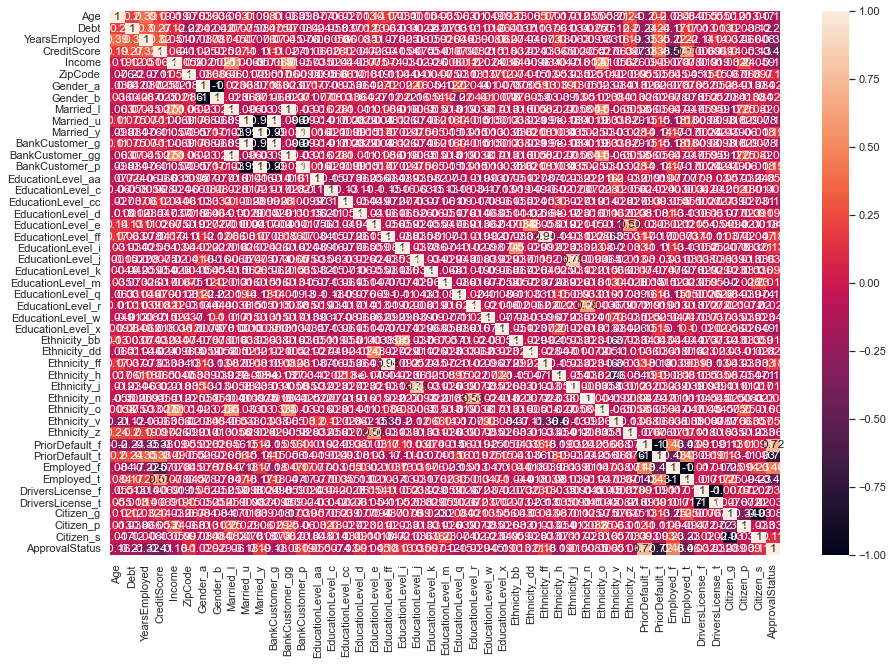

In [40]:
corr = finaldf.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [41]:
#Using KNN 
knn.score(X_train,y_train)

0.7934782608695652

In [42]:
knn.score(X_test,y_test)

0.7101449275362319

In [43]:
#Predicting the knn model
y_hat = knn.predict(X_test)
y_hat

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1])

In [44]:
knn.predict_proba(X_test), y_hat

(array([[0.4, 0.6],
        [0. , 1. ],
        [0.4, 0.6],
        [0.6, 0.4],
        [0.6, 0.4],
        [0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [0.2, 0.8],
        [0. , 1. ],
        [0.4, 0.6],
        [0.6, 0.4],
        [0.4, 0.6],
        [0.8, 0.2],
        [0.2, 0.8],
        [0.2, 0.8],
        [0.6, 0.4],
        [0.4, 0.6],
        [0.8, 0.2],
        [0.4, 0.6],
        [1. , 0. ],
        [0.6, 0.4],
        [0.6, 0.4],
        [0.4, 0.6],
        [0. , 1. ],
        [1. , 0. ],
        [0.4, 0.6],
        [0.2, 0.8],
        [0.4, 0.6],
        [0.4, 0.6],
        [0.6, 0.4],
        [0.4, 0.6],
        [0.8, 0.2],
        [1. , 0. ],
        [0.4, 0.6],
        [0.2, 0.8],
        [0.4, 0.6],
        [0.8, 0.2],
        [0. , 1. ],
        [0.2, 0.8],
        [0.2, 0.8],
        [0.6, 0.4],
        [0. , 1. ],
        [0.6, 0.4],
        [0. , 1. ],
        [0. , 1. ],
        [0.2, 0.8],
        [0.4, 0.6],
        [1. , 0. ],


In [45]:
matrix = confusion_matrix(y_test,y_hat)

Text(111.5, 0.5, 'Truth')

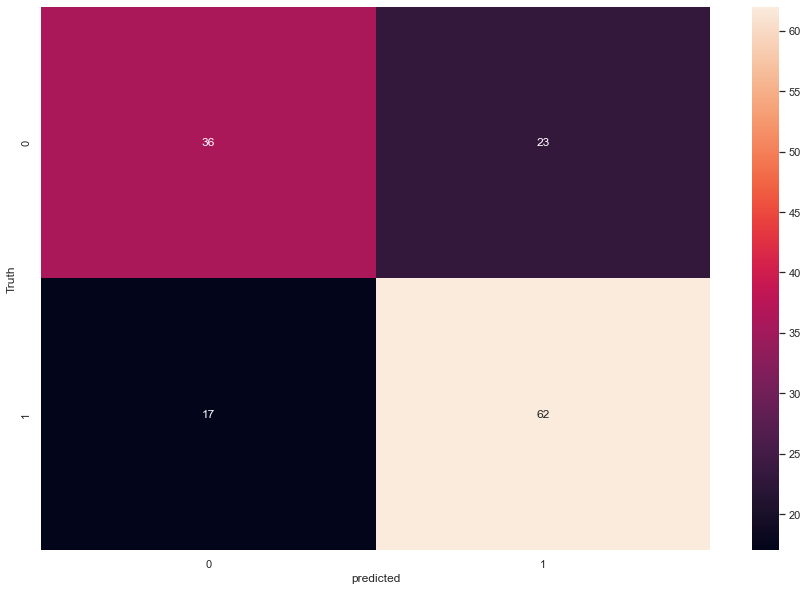

In [46]:
sns.heatmap(data=matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [47]:
#Using decision tree
classifier.score(X_train,y_train) 

1.0

In [48]:
classifier.score(X_test,y_test)

0.8333333333333334

In [49]:
#Predicting the test set result  
y_predict= classifier.predict(X_test)

Text(111.5, 0.5, 'Truth')

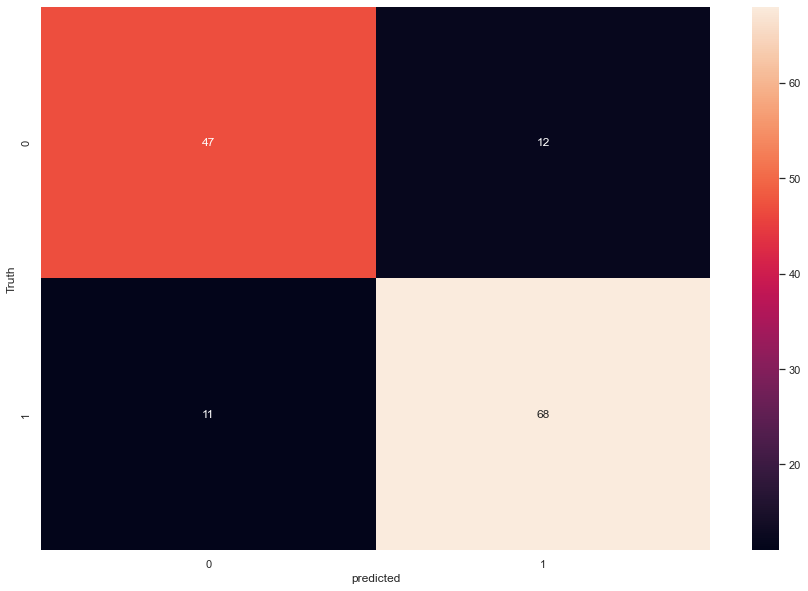

In [50]:
#Creating the Confusion matrix   
cm= confusion_matrix(y_test, y_predict)
sns.heatmap(data=cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

# 8. Making Prediction [2 M]
- Take any sample record from your training data and make prediction.

In [51]:
#using test data
model1.predict(X_test)
#predicted value for test data
y_hat = model1.predict(X_test)
#finding model accuracy using accuracy score from sklearn.metrics
accuracy_score(y_test,y_hat)

0.8695652173913043

In [52]:
#using train data
model1.predict(X_train)
#predicted value for train data
y_hat = model1.predict(X_train)
#finding model accuracy using accuracy score from sklearn.metrics
accuracy_score(y_train,y_hat)

0.8768115942028986

# 9. Conclusion [1 M]

- Conclude your takeaway from this activity.

 Logistic regression algorithm is the best algorithm for this dataset.